In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf
tf.__version__

'2.12.0'

In [3]:
df=pd.read_csv('AAPL.csv')

In [4]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [5]:
df=df['open'].values

In [6]:
df

array([ 67.7142,  68.0714,  68.5014, ..., 159.1   , 154.83  , 163.085 ])

In [7]:
df.shape

(1259,)

In [8]:
df=df.reshape(-1,1)

In [9]:
df

array([[ 67.7142],
       [ 68.0714],
       [ 68.5014],
       ...,
       [159.1   ],
       [154.83  ],
       [163.085 ]])

In [10]:
(df.shape[0]*0.8)-50

957.2

In [11]:
dataset_train=np.array(df[:int(df.shape[0]*0.8)])
dataset_test=np.array(df[int(df.shape[0]*0.8)-50:])

In [12]:
dataset_test.shape

(302, 1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
#default parameters but are still specified

In [15]:
dataset_train=scaler.fit_transform(dataset_train)

In [16]:
dataset_train[:7]

array([[0.15550899],
       [0.16002875],
       [0.16546966],
       [0.1432353 ],
       [0.13837263],
       [0.14619996],
       [0.1321915 ]])

In [17]:
dataset_test=scaler.transform(dataset_test)

In [18]:
dataset_test[:7]

array([[0.7048619 ],
       [0.70865789],
       [0.70043325],
       [0.71080895],
       [0.69518213],
       [0.68006144],
       [0.69056368]])

In [19]:
def create_my_dataset(df):
    x=[]
    y=[]
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i,0])
    x=np.array(x)
    y=np.array(y)
    return x,y

In [20]:
x_train, y_train=create_my_dataset(dataset_train)
x_train[:1]

array([[0.15550899, 0.16002875, 0.16546966, 0.1432353 , 0.13837263,
        0.14619996, 0.1321915 , 0.12602681, 0.10489581, 0.11077074,
        0.11908522, 0.10095558, 0.10928904, 0.10137187, 0.09043563,
        0.07199725, 0.06057385, 0.08412669, 0.06603248, 0.07561229,
        0.07552245, 0.08609681, 0.07317274, 0.0810899 , 0.09030909,
        0.09667117, 0.12929896, 0.1255384 , 0.11252448, 0.12040496,
        0.13868011, 0.14003654, 0.12380363, 0.11180072, 0.09748478,
        0.07163663, 0.07845043, 0.08277153, 0.06603248, 0.06666515,
        0.06939446, 0.07254007, 0.08269814, 0.08347632, 0.07055098,
        0.06073581, 0.0583861 , 0.03076649, 0.        , 0.00844228]])

In [21]:
x_train[:1].shape

(1, 50)

In [22]:
x_test, y_test=create_my_dataset(dataset_test)

In [23]:
x_test[:1]

array([[0.7048619 , 0.70865789, 0.70043325, 0.71080895, 0.69518213,
        0.68006144, 0.69056368, 0.68423703, 0.68120024, 0.70144551,
        0.71979279, 0.73219302, 0.73915233, 0.75433628, 0.7586384 ,
        0.7724305 , 0.76395279, 0.77584689, 0.77660608, 0.7709121 ,
        0.7612956 , 0.77306316, 0.78571645, 0.77217743, 0.77470809,
        0.76395279, 0.76458545, 0.76547118, 0.77635302, 0.79115737,
        0.80153307, 0.80115347, 0.80311474, 0.80583519, 0.79609216,
        0.81709663, 0.80950465, 0.82279061, 0.81709663, 0.81140264,
        0.82241101, 0.83822763, 0.84417468, 0.82886419, 0.83164791,
        0.90604929, 0.91800665, 0.9222455 , 0.93262121, 0.95046235]])

In [24]:
df

array([[ 67.7142],
       [ 68.0714],
       [ 68.5014],
       ...,
       [159.1   ],
       [154.83  ],
       [163.085 ]])

In [25]:
x_train.shape

(957, 50)

In [26]:
#(957, 50, 1)
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_train.shape
x_test.shape

(252, 50, 1)

# Creating a Neural Network

In [27]:
model=Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 96)                74112     
                                                                 
 dropout_2 (Dropout)         (None, 96)                0         
                                                                 
 dense (Dense)               (None, 1)                 9

In [29]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [30]:
#fitting the training data into model
if (os.path.exists(r'C:\Users\kabir\OneDrive\Documents\LSTM Model')):
    
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save(r'C:\Users\kabir\OneDrive\Documents\LSTM Model')

Epoch 1/50
30/30 [==============================] - 8s 78ms/step - loss: 0.0456
Epoch 2/50
30/30 [==============================] - 2s 70ms/step - loss: 0.0068
Epoch 3/50
30/30 [==============================] - 2s 74ms/step - loss: 0.0049
Epoch 4/50
30/30 [==============================] - 2s 76ms/step - loss: 0.0045
Epoch 5/50
30/30 [==============================] - 2s 73ms/step - loss: 0.0045
Epoch 6/50
30/30 [==============================] - 2s 68ms/step - loss: 0.0045
Epoch 7/50
30/30 [==============================] - 2s 68ms/step - loss: 0.0045
Epoch 8/50
30/30 [==============================] - 2s 67ms/step - loss: 0.0039
Epoch 9/50
30/30 [==============================] - 2s 67ms/step - loss: 0.0038
Epoch 10/50
30/30 [==============================] - 2s 68ms/step - loss: 0.0040
Epoch 11/50
30/30 [==============================] - 2s 67ms/step - loss: 0.0040
Epoch 12/50
30/30 [==============================] - 2s 67ms/step - loss: 0.0038
Epoch 13/50
30/30 [==================

INFO:tensorflow:Assets written to: C:\Users\kabir\OneDrive\Documents\LSTM Model\assets


INFO:tensorflow:Assets written to: C:\Users\kabir\OneDrive\Documents\LSTM Model\assets


In [31]:
model=load_model(r'C:\Users\kabir\OneDrive\Documents\LSTM Model')

In [32]:
predictions=model.predict(x_test)

8/8 [==============================] - 1s 26ms/step


In [33]:
predictions=scaler.inverse_transform(predictions)

range(1007, 1259)


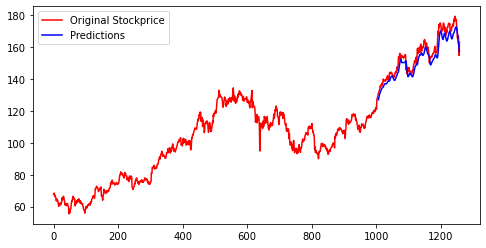

In [34]:
fig, ax=plt.subplots(figsize=(8,4))
plt.plot(df,color='red', label='Original Stockprice')
ax.plot(range(len(y_train)+50, len(y_train)+50+len(predictions)),predictions, color='blue', label='Predictions')
plt.legend()
print(range(len(y_train)+50, len(y_train)+50+len(predictions)))

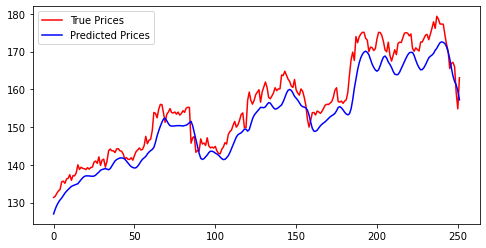

In [35]:
y_test_scaled=scaler.inverse_transform(y_test.reshape(-1,1))
fig,ax=plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Prices')
plt.plot(predictions, color='blue', label='Predicted Prices')
plt.legend()